In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
plt.style.use('seaborn-white')

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

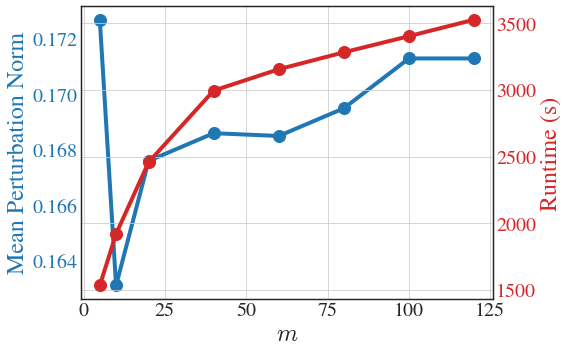

In [9]:
# covtype mean norm and runtime vs. m
norm = [0.1727, 0.1631, 0.1676, 0.1686,
        0.1685, 0.1695, 0.1713, 0.1713,]
time = [1533, 1919.63, 2458.21, 2995.39,
        3155.54, 3282.49, 3403.61, 3527.36]
m = [5, 10, 20, 40, 60, 80, 100, 120]

label_fs = 24
tick_fs = 20
lw = 4
ms = 12

fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.grid(axis='x')
ax1.set_xlabel(r'$m$', fontsize=label_fs)
ax1.set_ylabel('Mean Perturbation Norm', color=color, fontsize=label_fs)
ax1.plot(m, norm, '-o', color=color, lw=lw, ms=ms)
ax1.tick_params(axis='y', labelcolor=color, labelsize=tick_fs)
ax1.tick_params(axis='x', labelsize=tick_fs)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Runtime (s)', color=color, fontsize=label_fs)  # we already handled the x-label with ax1
ax2.plot(m, time, '-o', color=color, lw=lw, ms=ms)
ax2.tick_params(axis='y', labelcolor=color, labelsize=tick_fs)

# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax2.grid(None)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('covtype_m.pdf', dpi=300, bbox_inches='tight')
plt.show()

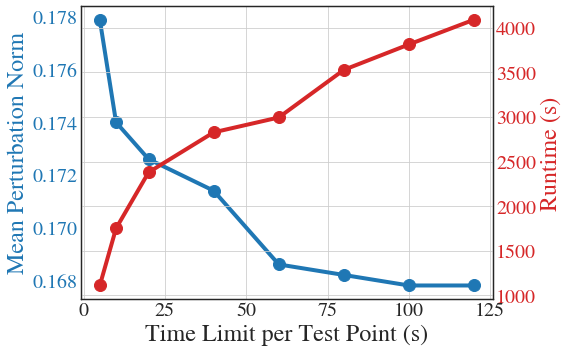

In [11]:
# covtype mean norm and runtime vs. time limit

norm = [0.1779, 0.1740, 0.1726, 0.1714,
        0.1686, 0.1682, 0.1678, 0.1678,]
time = [1110.91, 1751.94, 2380.13, 2828.65,
        2995.39, 3529.19, 3814.68, 4092.17]
tl = [20, 40, 60, 80, 100, 120, 140, 160]

# label_fs = 20
# tick_fs = 12

fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Time Limit per Test Point (s)', fontsize=label_fs)
ax1.set_ylabel('Mean Perturbation Norm', color=color, fontsize=label_fs)
ax1.plot(m, norm, '-o', color=color, lw=lw, ms=ms)
ax1.tick_params(axis='y', labelcolor=color, labelsize=tick_fs)
ax1.tick_params(axis='x', labelsize=tick_fs)
ax1.grid(axis='x')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Runtime (s)', color=color, fontsize=label_fs)  # we already handled the x-label with ax1
ax2.plot(m, time, '-o', color=color, lw=lw, ms=ms)
ax2.tick_params(axis='y', labelcolor=color, labelsize=tick_fs)

# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax2.grid(None)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('covtype_tl.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
sit = [
0.0501,
0.0611,
0.0730,
0.0888,
0.1040,
0.1099,
0.1201,
]
yang = [
0.1635,
0.1781,
0.1830,
0.1937,
0.2007,
0.2089,
0.2242,
]
wang = [
0.1085,
0.1212,
0.1292,
0.1404,
0.1512,
0.1576,
0.1616,
]
our = [
0.0324,
0.0447,
0.0607,
0.0774,
0.0954,
0.1033,
0.1134,
]
norms = np.vstack([sit, yang, wang, our])
# kld = np.array([
# 0.1215,
# 0.3158,
# 0.5867,
# 0.9186,
# 1.2993,
# 1.7139,
# 2.1493,
# ])
kld = np.array([
0.18,
0.5,
0.98,
1.62,
    2.42,
    3.38,
    4.5,
])
norm_ratio = norms / norms[3]

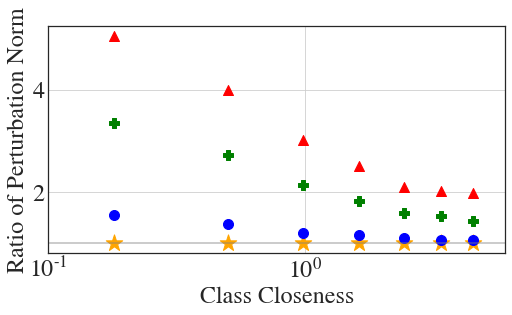

In [52]:
ms = 100
label_fs = 24
tick_fs = 24

plt.figure(figsize=(7,4), constrained_layout=True)

plt.scatter(kld, norm_ratio[3], marker='*', s=ms + 200, color='orange', label='GeoAdEx')
plt.scatter(kld, norm_ratio[0], marker='o', s=ms, color='blue', label='Sitawarin et al.')
plt.scatter(kld, norm_ratio[1], marker='^', s=ms, color='red', label='Yang et al.')
plt.scatter(kld, norm_ratio[2], marker='P', s=ms, color='green', label='Wang et al.')
plt.hlines(1, 0, 100, color='grey', lw=2, alpha=0.4)

plt.xscale('log')
# plt.legend(fontsize=16, frameon=True)
plt.ylabel('Ratio of Perturbation Norm', fontsize=label_fs)
plt.xlabel('Class Closeness', fontsize=label_fs)
# plt.xlim(3e-1, 70)
plt.xlim(1e-1, 6)
# plt.xlim(0, 2.3)
plt.tick_params(axis='x', labelsize=tick_fs)
plt.tick_params(axis='y', labelsize=tick_fs)

plt.savefig('kld_gauss.pdf', dpi=300, bbox_inches='tight')
plt.grid(True, axis='both')
plt.show()

In [36]:
sit = [.516, .182, .119, .128, .056, .127, .217]
yang = [.443, .287, .115, .127, .115, .131, .178]
wang = [.455, .184, .118, .125, .083, .128, .183]
our = [.395, .138, .080, .123, .039, .111, .197]
# sit = [.534,.224,.143,.128,.061,.132, 0.0730, 0.0888, 0.1201]
# yang = [.524,.350,.184,.130,.178,.142, 0.1830, 0.1937, 0.2242]
# wang = [.488,.237,.138,.128,.121,.135, 0.1292, 0.1404, 0.1616]
# our = [.513 ,.197,.125,.126,.044,.124, 0.0607, 0.0774, 0.1134]
norms = np.vstack([sit, yang, wang, our])

In [39]:
# norm / our norm vs. kld
norm_ratio = norms / norms[3]
# kld = np.array([47.07, 0, 1.64, 1.28, 0.50, 18.90])
kld = np.array([
8.2054,
-6.6655,
1.0242,
2.8437,
0.3158,
10.2208,
# 0.5867,
# 0.9186,
# 2.1493
6.9304,
])

datasets = ['Australian', 'Diabetes', 'Fourclass', 'Gaussian', 'Letters', 'fmnist06']

# exclude covtype
idx = np.arange(len(kld))
kld = kld[idx != 1]
norm_ratio = norm_ratio[:, idx != 1]

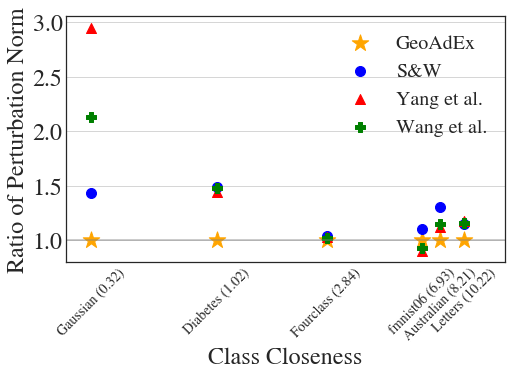

In [48]:
ms = 100
label_fs = 24
tick_fs = 24

fig = plt.figure(figsize=(7, 5), constrained_layout=True)
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

plt.hlines(1, 0, 100, color='grey', lw=2, alpha=0.4)

plt.scatter(kld, norm_ratio[3], marker='*', s=ms + 200, color='orange', label='GeoAdEx')
plt.scatter(kld, norm_ratio[0], marker='o', s=ms, color='blue', label='S&W')
plt.scatter(kld, norm_ratio[1], marker='^', s=ms, color='red', label='Yang et al.')
plt.scatter(kld, norm_ratio[2], marker='P', s=ms, color='green', label='Wang et al.')
plt.xscale('log')
plt.legend(fontsize=20, frameon=False)
plt.ylabel('Ratio of Perturbation Norm', fontsize=label_fs)
plt.xlabel('Class Closeness', fontsize=label_fs)
# plt.xlim(3e-1, 70)
plt.xlim(2.5e-1, 15)
# plt.xlim(0, 11)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=tick_fs)
# ax.set_xticklabels(kld)
# plt.xticks(kld, [f'{k:.2f}' for k in kld], rotation=60)
# plt.xticks(kld, datasets, rotation=60)
plt.xticks(kld, [f'{datasets[i]} ({k:.2f})' for i, k in enumerate(kld)], rotation=45)

# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
# ax2.grid(None)

plt.savefig('kld_others.pdf', dpi=300, bbox_inches='tight')
plt.grid(True, axis='y')
plt.show()